<a href="https://colab.research.google.com/github/Etienne-98/2022_Intro_Python/blob/main/Exercises/W2_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hint: For this entire notebook, rather than directly filling out the entire code snippet in one go, we recommend copy-pasting hints line-by-line to progressively replicate the target figure. That way, you can learn by trial-and-error.

**To add a new cell above, press "Escape" and type 'a'**

**To add a new cell below, press "Escape" and type 'b'**

**To delete a cell, press Ctrl-M + D**

# Exercise 1: Replicating Plots using `Matplotlib` and `Numpy`

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. There is no need to focus on how this code exactly works. In the end, it will give you some `numpy` arrays, which you will use in your plots. 

This exercise should be done using **only `numpy` and `matplotlib`**.

## Part I: Line and Contour Plots to Visualize Global Temperature Data
The temperature data are from the [NCEP/NCAR atmospheric reanalysis 1](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html).

In [1]:
# We'll need to load the data from the UNIL sharepoint using pooch, so let's
# import the library
import pooch
import numpy as np
import matplotlib.pyplot as plt

# In order to keep our code concise and readable, we'll use a variable that 
# stores the common part of the URL where the data is hosted. Then, we'll store
# the full URL for each file in its own variable
base_url = 'https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/'
lon_url =  f'{base_url}EQtSkmHdXlZAuZcDljeHXuMBIVGfXP4lkR56RX6vuCDh1Q?download=1'
lat_url =  f'{base_url}EbMAwn26etZPjxw4F3akRt8BmPef3PMQPn751e6tF0Xi-Q?download=1'
temp_url = f'{base_url}EfUOMGrJNtVMgJUtfP9137sB9d64M_osBRPa0iQRSCHKGg?download=1'

# Let's go ahead and cache each file
lon_filename  = pooch.retrieve(lon_url, 
                               known_hash='eaf54b88dd89279d3034da17fe8470dc2c841bf9fa89b2aa741dacff9c326cdb'
                               )

lat_filename  = pooch.retrieve(lat_url, 
                               known_hash='af1f438080460e1fca4583b2ec19b44285a3d3776e4d21b8da9b6e162906c88a'
                               )
temp_filename = pooch.retrieve(temp_url, 
                               known_hash='e040ca257334708b43e86398e09a5669fcf051179ecf5dcd278f758d67beed20'
                               )

# And then load each file into a numpy array. You can now use these variables
# to continue with the exercise :)
lon = np.load(lon_filename)
lat = np.load(lat_filename)
temp = np.load(temp_filename)
print(lon.shape, lat.shape, temp.shape)

(192,) (94,) (94, 192)


Below is the figure to replicate using the `numpy` variables `temp`, `lon`, and `lat`.

Hint 1: Zonal-mean is synonymous with longitudinal-mean, i.e. the mean must be taken along the `axis` corresponding to `lon`.

Hint 2: To create subplots of different sizes, consider reading the [`plt.subplots` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

Hint 3: For the left subplot, check out the [2D Plotting Methods section](#2D_Plotting_Methods).

Hint 4: For the right subplot, check out the [Label, Ticks, and Gridlines subsection](#Label).

Hint 5: Don't spend too too much time making your figure perfect as there is still a lot of ground to cover in the next notebooks 😀

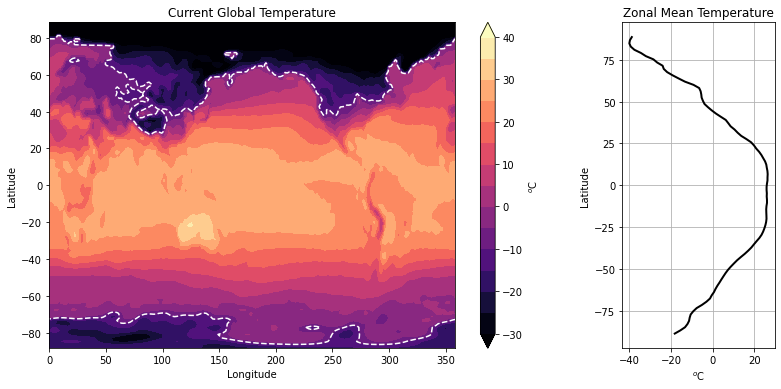

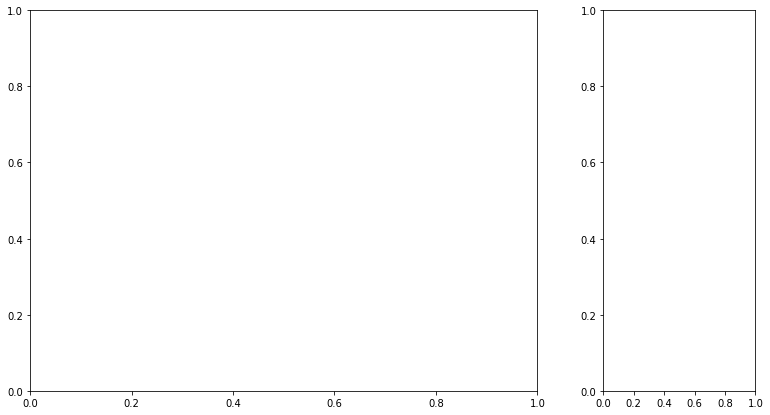

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,7),gridspec_kw={'width_ratios': [5, 1.5]})


In [21]:
ctemp = ax1.contourf(lon,lat,temp-273.15,cmap='magma',levels=np.linspace(-30,40,15),extend='both')

In [23]:
ax1.contour(lon,lat,temp-273.15,colors='w',levels=[-10],extend='both')

In [24]:
# first graph parameters 
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Current global temperature')

Text(0.5, 1.0, 'Current global temperature')

In [26]:
fig.colorbar(ctemp,ax=ax1,label='$^o$C')

In [29]:
ax2.plot(np.nanmean(temp-273.15,axis=1),lat,lw=2,c='k')

In [30]:
# second graph plot parameters such as ordinates, abscisses and title
ax2.set_xlabel(r'$^{o}$C')
ax2.set_ylabel(r'Latitude')
ax2.set_title('Zonal Mean Temperature')

Text(0.5, 1.0, 'Zonal Mean Temperature')

In [ ]:

plt.____()
plt.show()

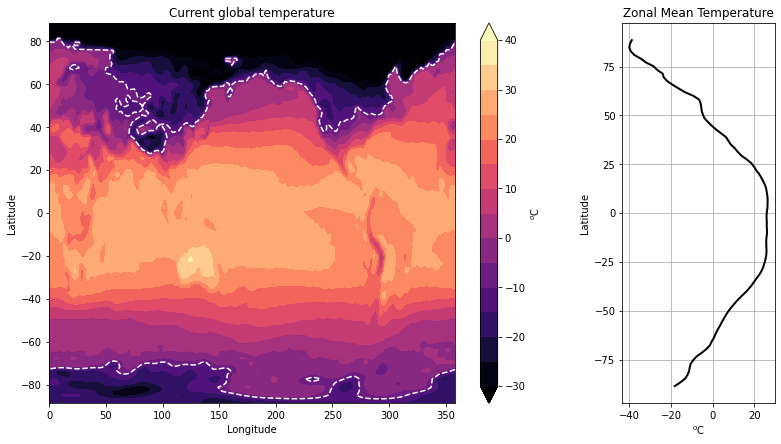

In [2]:
# Replicate this figure
# Temperature values are originally in Kelvin units -> Convert to degree celsius by subtracting 273.15
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13,7),gridspec_kw={'width_ratios': [5, 1.5]}) # set the axis system
ctemp = ax1.contourf(lon,lat,temp-273.15,
                    cmap='magma',
                    levels=np.linspace(-30,40,15),
                    extend='both')
ax1.contour(lon,lat,temp-273.15,
            colors='w',
            levels=[-10],
            extend='both')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Current global temperature')
fig.colorbar(ctemp,
             ax=ax1,
             label='$^o$C')  # working on axis 1 so ax = ax1 + colorbar

ax2.plot(np.nanmean(temp-273.15,axis=1),lat,lw=2,c='k') # plot axis 2
ax2.set_xlabel(r'$^{o}$C')                                 # set and name xlabel
ax2.set_ylabel(r'Latitude')                                # set and name ylabel
ax2.set_title('Zonal Mean Temperature')                    # set main title of axis 2
plt.grid()                                                 # plot a grid for better visualization
plt.show()                                                 # visualise

## Part II: Scatter Plots to Visualize Earthquake Data
Here, we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by `log10(depth)` and adjust the marker size to be `magnitude`

In [3]:
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg?download=1",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth       = earthquakes[:, 8]
magnitude   = earthquakes[:, 9]
latitude    = earthquakes[:, 20]
longitude   = earthquakes[:, 21]
print('depth shape=', depth.shape,'.')
print('magnitude shape=', magnitude.shape,'.')
print('latitude shape=', latitude.shape,'.')
print('longitude shape=', longitude.shape,'.')

Unzipping contents of '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg' to '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg.unzip'


depth shape= (5959,) .
magnitude shape= (5959,) .
latitude shape= (5959,) .
longitude shape= (5959,) .


Below is the figure to replicate using the `numpy` variables `earthquake`, `depth`, `magnitude`, `latitude`, and `longitude`.

Hint: Check out the [Scatter Plots subsection](#Scatter) and consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html). 

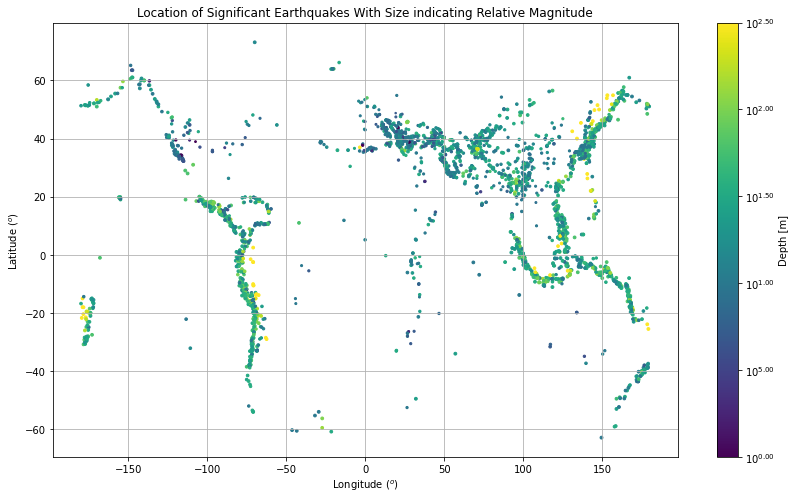

In [4]:
# This is the function to the set the ticks in the colorbar to be in scientific notations. 
# You can directly use this function and don't need to change anything in this cell.
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(a)

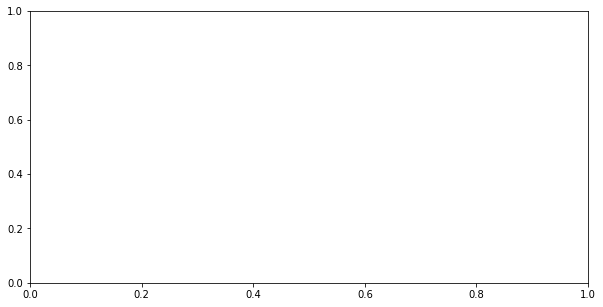

In [14]:
fig,ax = plt.subplots(1, 1, figsize=(10,5)) # opting for a 1-axed system

In [15]:

ctemp=ax.scatter(longitude,latitude,
                       s=magnitude,       # adjusted marker size 
                       c=np.log10(depth), # adjusted color
                       marker='o',        # marker shape
                       cmap='viridis',    
                       vmin=0, vmax=2.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
ax.set_xlabel('Longitude [°]') # set x label
ax.set_ylabel('Latutude [°]')  # set y label

Text(3.200000000000003, 0.5, 'Latutude [°]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


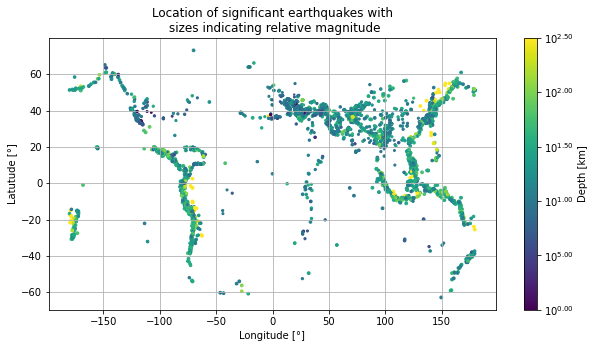

In [5]:
from matplotlib import colorbar
fig,ax = plt.subplots(1, 1, figsize=(10,5))  # opting for a 1-axed system (2 axes would've been 1,2, etc.)
ctemp  = ax.scatter(longitude,latitude,
                       s=magnitude,        # adjusted marker size 
                       c=np.log10(depth),  # adjusted color
                       marker='o',         # marker shape
                       cmap='viridis',     # colormap choice
                       vmin=0, vmax=2.5)
ax.set_xlabel('Longitude [°]')             # set x label
ax.set_ylabel('Latutude [°]')              # set y label
plt.grid()    
fig.colorbar(ctemp, 
              ax=ax,
              label='Depth [km]',
              format=ticker.FuncFormatter(fmt))
ax.set_title('Location of significant earthquakes with\n sizes indicating relative magnitude')
plt.show()

# Exercise 2: Cartopy

The goal of this exercise (congratulations for making it that far!! 😃) is to replicate the figures you see as closely as possible.

## Part I: Antarctic Sea Ice

**Q1) Download the file below and use it to plot the concentration of Antarctic Sea Ice.** 

Try to recreate the plot below.

Hint: Explore the file contents in order to determine the correct projection.

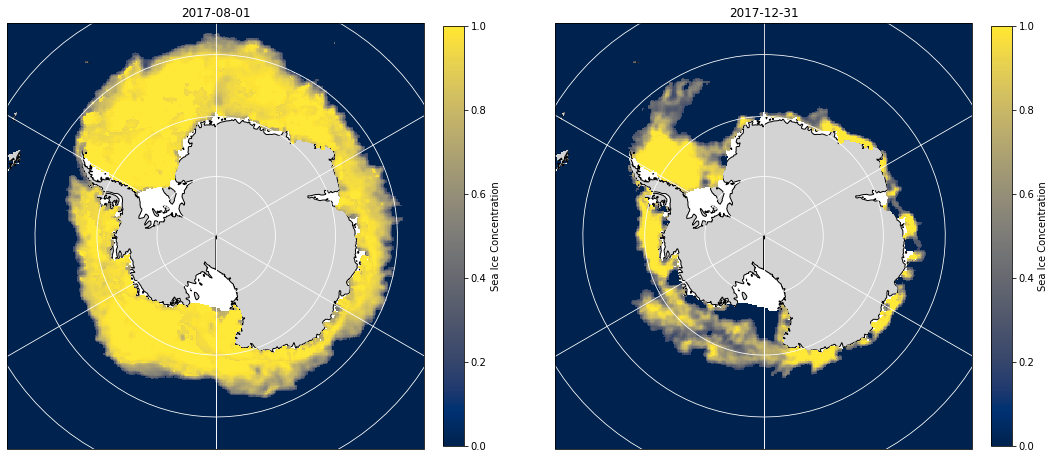

In [6]:
!pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 2.1 MB/s 
  Created wheel for shapely: filename=Shapely-1.6.4-cp37-cp37m-linux_x86_64.whl size=637773 sha256=88ee9fd97ddf59d5993978d4d3dabb7cbde56cd88965e6b96f01a461fce54e89
  Stored in directory: /root/.cache/pip/wheels/e3/8a/b6/48c41d66a2abc4fe5cc0916fda5e0f7121f1e5266f71747256
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 30.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... er

In [7]:
import pooch
import cartopy
import cartopy.crs as ccrs
#import xarray as xr
from netCDF4 import Dataset
#!pip install importlib-metadata==4.13.0
######################################################################################################################################################
# Download Sea Ice files
url1 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EREWA38Rs-FFslQd4yKZBAsBF8m9yLzeJKEAN5gSz7LLFw?download=1"
fname1 = pooch.retrieve(url1, known_hash='1ff50bca1e6249a9b2fcd9d9466e31bdb5be650243f99c7319ab2ce625b87ce7')
url2 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/Ea_2umrDTkhCrN--th4nuokBMcnVlxGshiyUq2eSpvhlTQ?download=1"
fname2 = pooch.retrieve(url2, known_hash='309418969ad09f42b8104589bcb86de4ed353a5742fef9385baec174c7d55e66')
######################################################################################################################################################
# Run these as is. We are reading the sea ice concentration values from our files
seaice1,seaice2 = Dataset(fname1,'r'), Dataset(fname2,'r')
var_toplot1,var_toplot2 = seaice1.variables['seaice_conc_cdr'][:], seaice2.variables['seaice_conc_cdr'][:]

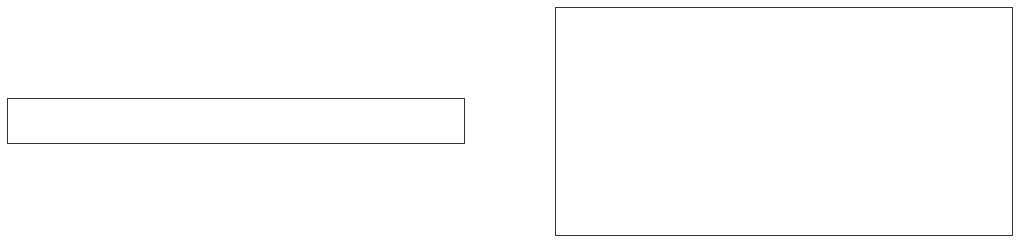

In [4]:
import matplotlib.pyplot as plt
#import cartopy.feature as cfeature
import numpy as np

fig,ax = plt.subplots(1,2,figsize=(18, 12),subplot_kw={'projection': ccrs.PlateCarree()})
# The rest doesn't change:
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

In [9]:
ax[0].add_feature(cartopy.feature.LAND, 
                  edgecolor ='black',
                  facecolor ='lightgray')
ax[0].gridlines(lw=1, 
                color='w')

In [11]:
from numpy.ma.core import shape
print('the shape of var_toplot1 is: ', var_toplot1.shape,'.')
print('the shape of var_toplot2 is: ', var_toplot2.shape,'.')

the shape of var_toplot1 is:  (1, 332, 316) .
the shape of var_toplot2 is:  (1, 332, 316) .


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


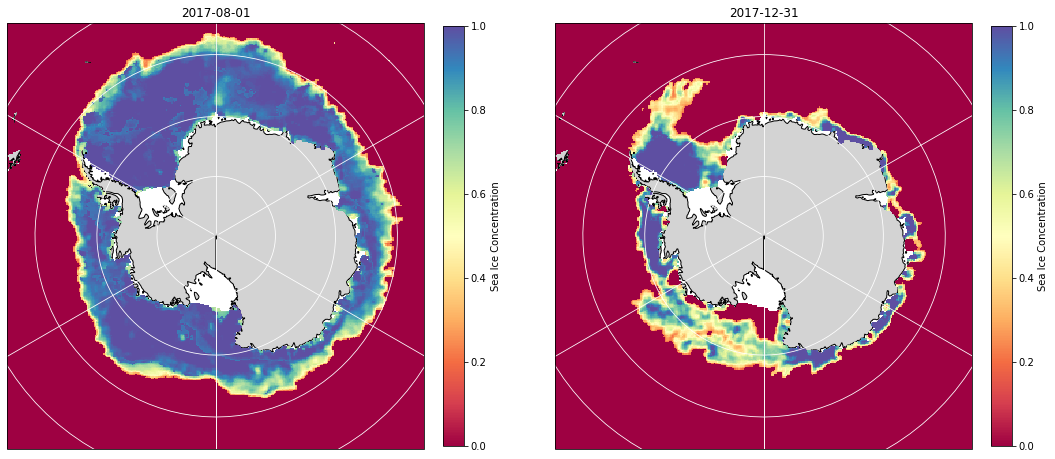

In [8]:
import matplotlib.pyplot as plt
#import cartopy.feature as cfeature
import numpy as np

fig,ax = plt.subplots(1,2,figsize=(18, 12),subplot_kw={'projection': ccrs.SouthPolarStereo()})
# The rest doesn't change:
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land and gridlines
# Hint: Check edgecolor to show coast, and facecolor to color the continent
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax[0].add_feature(cartopy.feature.LAND, 
                  edgecolor ='black',
                  facecolor ='lightgray')
ax[0].gridlines(lw=1, 
                color='w')
######################################################################################################################################################
# Add Contours
# Hint: X (Y) data in the pcolormesh should be the longitude and latitude of the sea ice data.
# Hint: Check the shape of the var_toplot1, var_toplot2 before plotting (1,332,316)
# Hint: longitude and latitude can be accessed with seaice1.variables['longitude'][:], seaice1.latitude / seaice2.logitude, seaice2.latitude
# Hint: Check this website: https://matplotlib.org/stable/tutorials/colors/colormaps.html for available colormaps
######################################################################################################################################################
ctemp1 = ax[0].pcolormesh(seaice1.variables['longitude'][:], seaice1.variables['latitude'][:], 
                          np.ma.masked_greater(var_toplot1[0],1), 
                          transform=ccrs.PlateCarree(),
                          vmin=0,vmax=1, 
                          cmap='Spectral')
plt.colorbar(ctemp1,ax=ax[0],
             fraction=0.046, 
             pad=0.04,
             label='Sea Ice Concentration')
ax[0].set_title('2017-08-01') # add a title to the first graph

# then add the same features to axis 2 which is ax[1]:
ax[1].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
ax[1].add_feature(cartopy.feature.LAND, 
                  edgecolor='black',
                  facecolor='lightgray') # add specific features such as LAND; color etc.
ax[1].gridlines(lw=1,  
                color='w')               # add gridlines of width = 1 and color = white

ctemp2 = ax[1].pcolormesh(seaice2.variables['longitude'][:], seaice2.variables['latitude'][:], 
                          np.ma.masked_greater(var_toplot2[0],1), 
                          transform=ccrs.PlateCarree(),
                          vmin=0,vmax=1,
                          cmap='Spectral')
plt.colorbar(ctemp2,ax=ax[1],label='Sea Ice Concentration',
             fraction=0.046, 
             pad=0.04)
ax[1].set_title('2017-12-31') # add a title to the second graph
plt.show()

## Part II: 2014 Earthquakes
**Q2) Download the file below and use it to plot the location of >4 Richter Scale earthquakes in the US during 2014.** 

Hint: Explore the file contents in order to determine the correct projection.

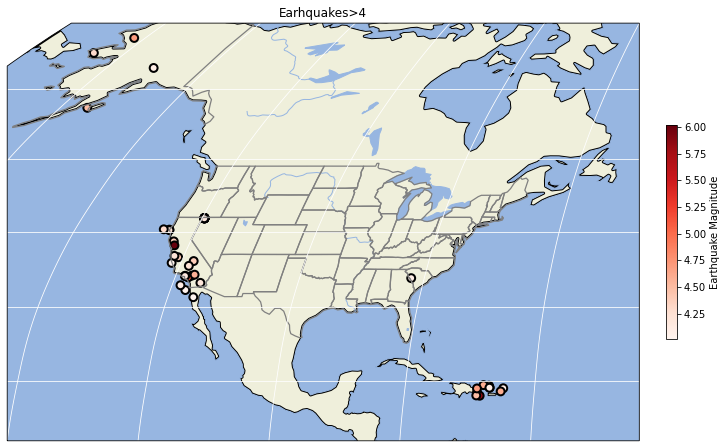

In [10]:
import pandas as pd
#from netCDF4 import Dataset
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Ea9h1j2_wYpEtuX5waZZWpsBt2zh3lvGUBFisvA8dFG5Eg?download=1",
    known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')
usgs_2014 = pd.read_csv(fname)

#earth_mag = Dataset(fname,'r')
#long_data, lat_data, mag_data = earth_mag.variables['longitude'][:], earth_mag.variables['latitude'][:], earth_mag.variables['mag'][:]

In [11]:
a,b,c = 1,2,3
print('a=', a,
      'b=',b,
      'c=',c)

a= 1 b= 2 c= 3


In [12]:
######################################################################################################################################################
# Run these as is. We are removing missing values in the data and filter data points with stronger earthquakes (magnitude > 4)
usgs_2014_nonan = usgs_2014.dropna()
usgs_2014_large = usgs_2014_nonan[usgs_2014_nonan['mag']>4]

AttributeError: ignored

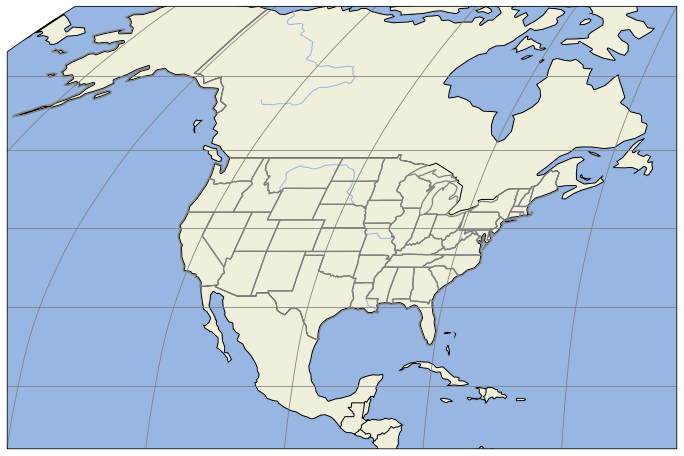

In [13]:
fig,ax = plt.subplots(1,1,figsize=(12, 12),subplot_kw={'projection': ccrs.Robinson()})
# The rest doesn't change:
ax.set_extent([-140, -60, 12,70], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land, Ocean, Rivers, and State Lines
# Hint: Land linewidth = 3; States: edgecolor='gray',linewidth=1.25; lakes/ocean/rivers: no change
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax.add_feature(cartopy.feature.LAND, 
               edgecolor='black',
               linewidths=3)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.STATES,
               edgecolor='grey',
               linewidth=1.25)
ax.gridlines(lw=1,color='grey')

######################################################################################################################################################
# Add Scatter points for earthquake data
# Hint: usgs_2014_large['longitude'] to access logitude data, usgs_2014_large['latitude'] to access latitude data, usgs_2014_large['mag'] to access Earthquake magnitudes
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
lon  = usgs_2014_large.variables['longitude']
lat  = usgs_2014_large.variables['latitude']
mag  = usgs_2014_large.variables['mag']
scat = ax.scatter(lon,
                  lat,
                  s=62,
                  c=mag,
                  marker='o',
                  cmap='viridis',
                  edgecolors='k',
                  linewidths=2, 
                  transform=ccrs.Robinson)
plt.colorbar(scat,
             ax=ax,
             fraction=0.016, 
             pad=0.04,
             label='Earthquake magnitude')
ax.set_title('Earthquakes whose magnitude \n exceed 4')
plt.show()